# White House Environmental Justice Lab #3

In this lab, we'll be continuing our analyis of the White House Environmental Justice data.

Let's start by running the following cell to load the necessary packages and set some important settings.

In [46]:
# Run this cell to get started

# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datascience import *
import datascience as ds
from ipywidgets import *
import statsmodels.formula.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Setting plot and table configurations
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()
pd.set_option('display.max_columns', None)

## The Data

As from previous labs, we will be using data from the White House Environmental Justice (Need source/link). This subset of the full data set focuses on California, providing data on health outcomes and environmental conditions.


Run the next cell to read the data in to a table.

In [2]:
# Run this cell to load the data
data_string = "data/cleanCAwhej.csv"
df = pd.read_csv(data_string)
table = ds.Table.read_table(data_string)

Now that we have read the data into a table, let's take a look at the first couple of rows.

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,GEOID10,Housing burden (percent),Total population,Median household income (% of state median household income),Current asthma among adults aged >=18 years,Coronary heart disease among adults aged >=18 years,Cancer (excluding skin cancer) among adults aged >=18 years,Current lack of health insurance among adults aged 18-64 years,Diagnosed diabetes among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Particulate matter (PM2.5),Ozone,Traffic proximity and volume,Proximity to RMP sites,Proximity to TSDF sites,Proximity to NPL sites,Wastewater discharge,Percent pre-1960s housing (lead paint indicator),Individuals under 5 years old,Individuals over 64 years old,Linguistic isolation (percent),Percent of households in linguistic isolation,Poverty (Less than 200% of federal poverty line),Percent individuals age 25 or over with less than high school degree,Unemployed civilians (percent),Housing + Transportation Costs % Income for the Regional Typical Household,Score A,Score B,Socioeconomic Factors,Sensitive populations,Environmental effects,Exposures,Pollution Burden,Population Characteristics,Score C,Score D,Score E,"Low AMI, Low HS graduation",Meets socioeconomic criteria,Meets burden criteria,Score F (communities),OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,D_PM25_2,D_OZONE_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_LDPNT_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_PWDIS_2,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area,FIPS code,State Abr.,County name,CBSA title,CBSA 2012 pop,County 2012 pop,2013 code,2006 code,1990-based code
0,0,10297,60014001001,0.14330,2991,2.922323,7.9,5.1,8.5,4.8,8.0,9.0,26.496604,0.437041,0.597205,8.272783,29.312510,1128.001614,0.175204,2.292090,0.118582,0.0,0.176558,0.061852,0.254096,0.011601,0.036683,0.095909,0.017828,0.050000,76.0,0.115592,0.013343,0.485942,0.669558,0.480974,0.488320,0.485871,0.577750,0.280712,0.055911,0.297226,False,False,False,False,10298,60014001001,California,CA,9,2991,-3824.220643,-13550.156040,-276.067254,-12248.460670,-202.028692,-5.214360e+05,-81.616573,-54.816203,-80.990880,-1059.553708,0.0,8.272783,29.312510,0.597205,26.496604,0.437041,1128.001614,0.176558,0.118582,0.175204,2.292090,0.0,0.201916,0.129048,0.307924,0.095909,0.036683,0.017828,0.061852,0.254096,18116.601500,1.108122e+07,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
1,1,10298,60014002001,0.06875,1102,3.156775,8.0,4.0,6.9,4.8,6.1,7.6,28.281955,0.477660,0.784154,8.309303,28.514542,5492.556095,0.236346,5.426261,0.152012,0.0,0.957014,0.081670,0.195100,0.000000,0.000000,0.078947,0.030941,0.036082,55.0,0.135196,0.016439,0.309663,0.576540,0.658200,0.564220,0.595547,0.443102,0.263888,0.039194,0.196257,False,False,True,False,10299,60014002001,California,CA,9,1102,-1552.411631,-5327.318832,-146.502048,-5283.865045,-89.240348,-1.026164e+06,-178.797067,-28.400038,-44.156077,-1013.778242,0.0,8.309303,28.514542,0.784154,28.281955,0.477660,5492.556095,0.957014,0.152012,0.236346,5.426261,0.0,0.186933,0.113596,0.294918,0.078947,0.000000,0.030941,0.081670,0.195100,3775.322995,4.642223e+05,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
2,2,10299,60014002002,0.06875,895,2.161002,8.0,4.0,6.9,4.8,6.1,7.6,28.281955,0.477660,0.784154,8.309303,28.514542,10897.251150,0.239507,5.930150,0.161547,0.0,0.871921,0.004469,0.194413,0.000000,0.000000,0.163861,0.009211,0.024845,54.0,0.155107,0.017313,0.288754,0.349317,0.655383,0.567425,0.596744,0.319035,0.190383,0.049583,0.181428,False,False,True,False,10300,60014002002,California,CA,9,895,-1011.337458,-3470.546717,-95.440543,-3442.238218,-58.136711,-1.326320e+06,-106.122806,-19.662099,-29.150738,-721.767224,0.0,8.309303,28.514542,0.784154,28.281955,0.477660,10897.251150,0.871921

Add something about what the data looks like/segue to next section

## Review

We'll provide an overview of the concepts we covered in lecture. If you feel confident about the material on correlation (r), regression and coefficient of determination (r-squared), feel free to skip ahead! It is important to have a solid understanding of these concepts -- they are at the heart of the later parts of this lab. Make sure to ask any questions you have to clarify these concepts so you can get the most out of this lab!

If you need some help or extra resources, try looking at the (insert resources)

### The Correlation Coefficient: $r$

$r$ is a number between -1 and 1 that tells you:

 1. **What the relationship between two variables looks like** and
 2. **How strong that relationship is.**

![Correlation Examples](img/correlation-examples.svg)

*If you're having trouble viewing the image in dark mode, try switching to light mode by clicking Settings>Theme>JupyterLab Light. You can also click [here](https://raw.githubusercontent.com/ds-modules/ESPM-163ac/11760f87d0bc6cd9d4352ea7c329b2738d38c9f6/images/correlation-examples.svg) to view it*

For more about the correlation coefficient, check out [Chapter 15.1](https://inferentialthinking.com/chapters/15/1/Correlation.html) in the Data 8 textbook.

We defined functions that help us calculate the correlation coefficient in lecture. Don't worry about how it is defined -- simply run the cell below!

In [4]:
# Helps us define the correlation function
def standard_units(xyz): #
    return (xyz - np.mean(xyz))/np.std(xyz) 

# Finds the correlation between two columns of a table
def correlation(table, label_x, label_y):
    return np.mean(standard_units(table[label_x])*standard_units(table[label_y]))

We can now use our `correlation()` function to calculate the correlation coefficient between any two variables in a table. Let's look of at an example from the `df` data frame and use the `CANCER` and `PM25` columns to see the relationship between these two variables.
 * The `CANCER` variable denotes the air toxics cancer risk
 * The `PM25` variable denotes the level of PM 2.5 particles in the air. Particulate matter less than 2.5 micrometers poses the greates risk to health. Learn more about PM 2.5 [here](https://www.epa.gov/pm-pollution/particulate-matter-pm-basics#effects).

In [5]:
correlation(df,"CANCER", "PM25")

0.7024783375831652

We get a correlation coefficient (also known as $r$) of **0.7024** from our calculation. What does this value mean regarding the relationship between the level of PM 2.5 and the risk of cancer risk?
 * The value of the correlation coefficient is positive. This means that there is some sort of positive correlation between these variables: as the value of one variable increases, the other increases as well.
 * We can infer that places with a higher level of PM 2.5 tend to have a higher ris of cancer.
 * The value is close to 1, indicating that there is fairly **strong** correlation between the level of PM 2.5 and cancer risk.

### Your Turn:

Pick two variables from the `df` data frame and calculate the correlation using `correlation()`.

In [6]:
correlation(df, "PRE1960PCT", "VULEOPCT")

0.17928598502885962

**Interpret this value**

*Your answer here.*

## Prediction Using Simple Linear Regression

Linear regression is really just a term for **making predictions using lines**. With two variables, linear regression is just a plain old line:

$$Y = mX + b$$


<center><img src = img/simple_linear_regression.jpg>/</center>



In the example above:
 * Y is what you are predicting (e.g. University GPA) and
 * X is what you are basing the prediction off of (e.g. High School GPA)

So, all we need to make this line are two values:
 * the slope (m) of the line and
 * the intercept (b) of the line!

If you recall from your algebra classes:
* the **y-intercept** is just what the Y-value is expected to be when X = 0 (where the line crosses the y-axis), and
* the **slope** tells you how much the Y-value changes when the X-value changes.

In other words, the **slope** is highly dependent on the **relationship** between X and Y -- it is dependent on **the correlation coefficient**.

That's right: **we need the correlation coefficient in order to find the equation for the regression line**.

You don't need to know how any of the following functions are defined: we've given you everything you need to calculate the slope and intercept of the regression line -- all you need to do is to **run the cell below**, and we will show you how to use the functions.

If you have additional questions, try looking at [Chapter 15.2](https://inferentialthinking.com/chapters/15/2/Regression_Line.html) in the Data 8 textbook for some pointers.

In [7]:
# Converts data from normal units into standard units
def standard_units(xyz):
    return (xyz - np.mean(xyz))/np.std(xyz) 
 # Added nanmean in line above
# Calculates the correlation using standard units
def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))
 # Added nanmean in line above
# We use these function to construct the regression line. As you can see, correlation is used to 
# evaluate the slope of the regression line below.

def slope(table, label_x, label_y):
    r = correlation(table, label_x, label_y) # correlation function used in slope!
    return r*np.std(table.column(label_y))/np.std(table.column(label_x))

def intercept(table, label_x, label_y):
    return np.mean(table.column(label_y)) - slope(table, label_x, label_y)*np.mean(table.column(label_x))
 # Added nanmean in line above

Suppose we want to find the equation of the regression line for the variables in the previous section - PM 2.5 & Cancer risk.

In [8]:
slope_of_reg_line = slope(table, "PM25", "CANCER")
slope_of_reg_line

2.4327678197156284

In [9]:
intercept_of_reg_line = intercept(table, "PM25", "CANCER")
intercept_of_reg_line

11.839349378891573

**Question**: Now we have the slope (m) and the intercept (b) of the the regression line. Given the values we just calculated above, what is the equation of the regression line?

*Your answer here.*

Now that we have the regression line, we can **plot it over our scatter plot** to visualize the prediction line on top of the actual data. The code cell below takes our slope and intercept, creates the function above (don't worry about how it is implemented). We can use this function to draw the regression line on top of our scatter plot!

In [10]:
# Defining the equation of the regression line
y = lambda x: slope_of_reg_line * x + intercept_of_reg_line

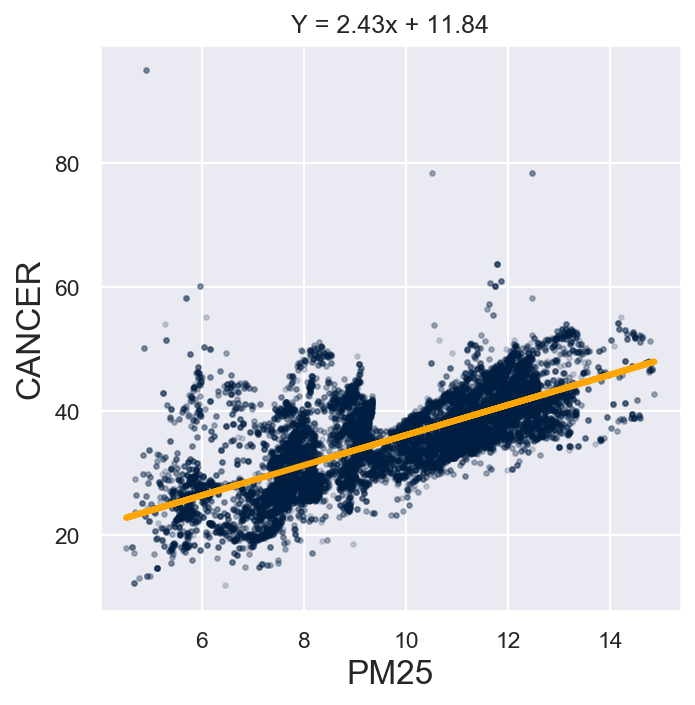

In [11]:
# Plotting the scatter plot
table.scatter("PM25", "CANCER", alpha = .16, s = 5) 

# Adding in the regression line
plt.plot(table.column('PM25'), y(table.column('PM25')), c = 'orange', lw = 3) 
# Adding a title
plt.title("Y = " + str(np.round(slope_of_reg_line,decimals=2)) + "x + " \
          + str(np.round(intercept_of_reg_line,decimals=2)));

The gold line above is the equation of the line you derived: $Y = 0.2.43*X + 11.84$. Amazingly, this simple line created by the equation in yellow is the best linear predictor of the data: out of all the infinitely many possible combinations of slopes and intercepts, the one we get from our functions predicts our data the best. If you know that an area has a PM 2.5 level of 12, what risk of cancer would you expect to see in that area? What about if the PM 2.5 level is 6? 

Conveniently, the .scatter() function has a setting that allows us to draw the regression line within the scatterplot (without doing any calculations!): all we do is to specify fit_line = True. Run the cell below and compare it to the plot above.

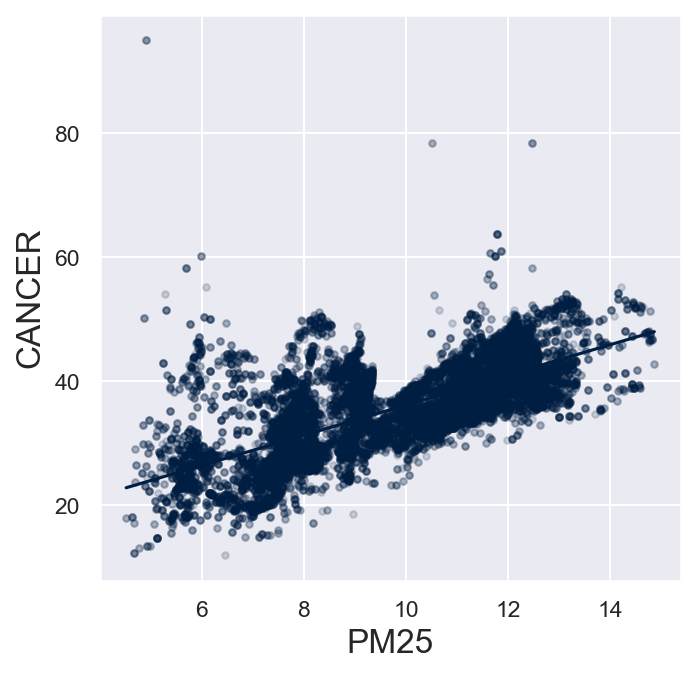

In [12]:
table2=ds.Table.from_df(df)
table2.scatter("PM25", "CANCER", fit_line=True, alpha = .16, s = 10)

## Coefficients fo Determination (R-Squared)

### How Good is our Predictive Model?

We know the following:
 * How to assess the relationship between two variables (correlation coefficient)
 * How to find the linear regression equation and use it to make **predictions**

But what if we want to assess how **effective** our linear regression model is? In other words, how do we evaluate how "good" our prediction is?

That is where the **Coefficient of Determination**, also called **r-squared**, comes in. It helps us assess the effectiveness of our predictive model and, more importantly, allows us to **compare** the effectiveness amongst various predictive models.

Here is all you need to know about **r-squared**:
* It's a number ranging from **0 to 1** that tells you how well the model predicts the outcome: 1 is a perfect prediction (if you know the X-value, you definitely know the Y-Value) while 0 is a terrible prediction (you might as well randomly guess!)

Side Note: It's called **r-squared** because in simple linear regression, the **Coefficient of Determination** is just the **square of the Correlation Coefficient r**. However, when we get to Multiple Regression (where we use TWO X variables to predict a Y variable for a total of 3 variables), we can't just rely on the relationship between **two** variables to evaluate the effectiveness of the model because the model can use **three** (or more!) variables. So, using r-squared allows us to compare model performance between any type of regression model!

For this lab, you are only responsible for **interpreting** the r-squared value.

## Simple Linear Regression

The goal of this lab is for you to use the tools we've shown you to conduct your own analysis of variables of your choice. Our focus is not on calculation but on the **interpretation** of graphs and analysis tools (r and r-squared); while you go through these examples, keep in mind the overarching question: **do environmental factors disproportionately affect the health outcomes of minority groups?**

### Demographic Index vs. Diabetes Health Outcome

Let's begin by analyzing the relationship between the demographic index of a census tract and the prevalence of diabetes. The following graph shows a scatter plot between demographic index and diabetes: each dot represents a census tract. At first, we will just look at the relationship (correlation: r) between demographic index and diabetes. Then we will draw a regression line over it and assess its effectiveness (r-squared).

In [13]:
table2=Table.from_df(df[~df["Diagnosed diabetes among adults aged >=18 years"].isna()])

r:  0.6373067198337461


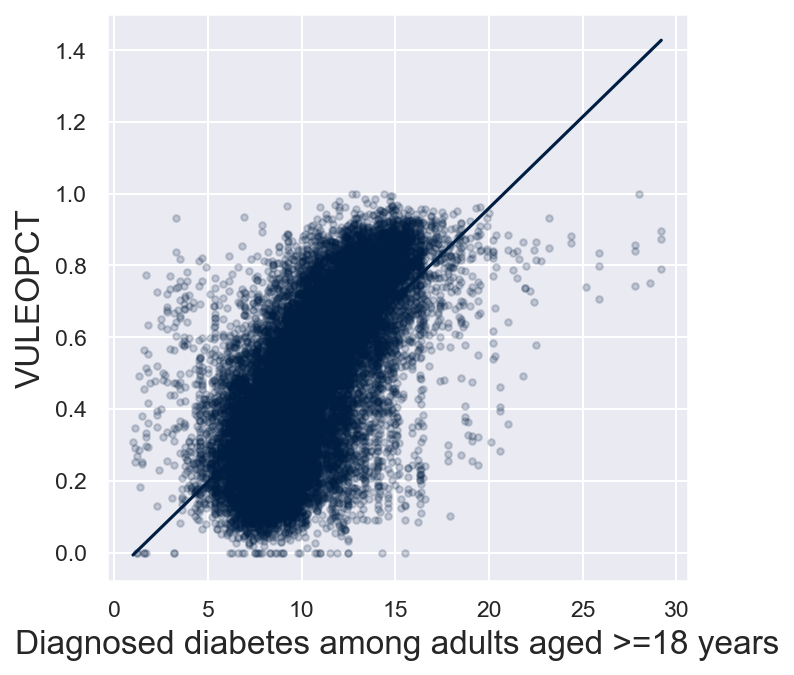

In [14]:
print('r: ', correlation(table2, 'Diagnosed diabetes among adults aged >=18 years', 'VULEOPCT'))
table2.scatter("Diagnosed diabetes among adults aged >=18 years", "VULEOPCT", fit_line=True, alpha = .18, s = 10)

Using the `correlation` function we defined above, we calculate the correlation coefficient (printed above the graph).

**Question:** What does this correlation value tell us about the relationship between pollution score and asthma prevalance?

Your answer here

r-squared:  0.40615985514524894


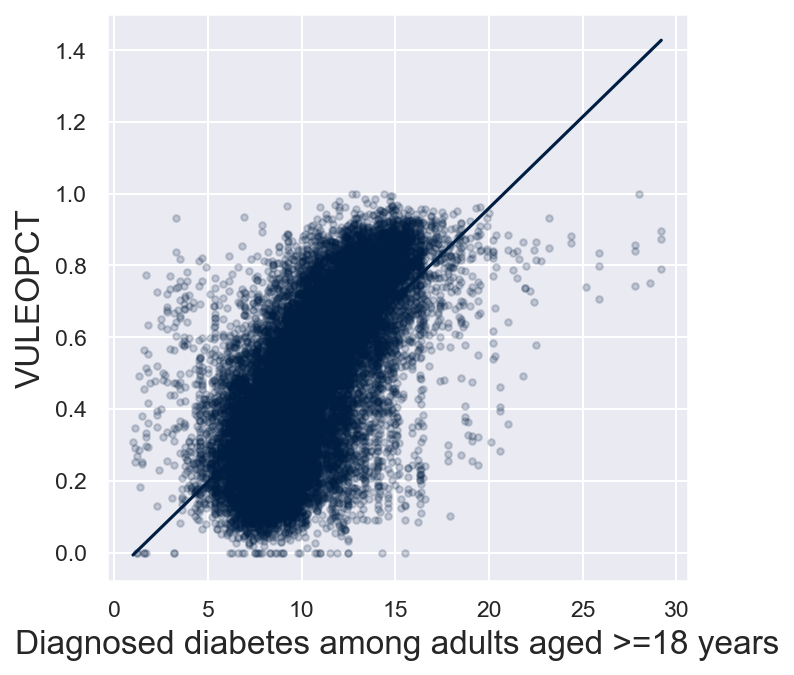

In [15]:
print('r-squared: ', correlation(table2, 'Diagnosed diabetes among adults aged >=18 years', 'VULEOPCT')**2)
table2.scatter('Diagnosed diabetes among adults aged >=18 years', 'VULEOPCT', fit_line=True, alpha = .18, s = 10)

**correlation coefficient:**

As we would assume, pollution score is correlated with asthma. But `r = 0.637` isn't a very strong relationship. Why? Think back to the example when r is nearly perfect: all the points in the scatter plot were almost in a perfect straight line. Does the above look like a near perfect straight line?

No. Even though this plot is clearly exhibiting a positive relationship between the two variables, the scatter plot sprays out: for a given demographic index, there is a pretty wide range of possible diabetes outcomes. So, while we know that an increase in demographic index tends to increase the number of diagnosed diabetes, we can't predict with much confidence exactly how many cases of diabetes there might be.

The regression line is drawn over the scatter plot to show the best "guess" for diabetes prevalence given a particular demographic score.

**r-squared:**

Now looking at the regression line, how can we assess how predictive our model (line) actually is? We turn to r-squared, a metric we use to measure how well the prediction line fits in with the scatter plot.

Take a look at when the demographic index is equal to 0.2, for example. The regression line predicts somewhere around 5 diagnosed cases of diabetes, but there have been as many as 16 cases in several census tracts and as few as 1 in others. In other words, the data is super spread out and not centered around the prediction line. Knowing the demographic score, therefore, doen't give us very much power to predict diabetes. This is what the r-squared tells us: it helps us assess the effectiveness of our predictive model.

Run the cell below to find the value of r-squared for the above plot.


In [16]:
table3=table2

In [17]:
table4= table3.relabeled("Diagnosed diabetes among adults aged >=18 years","diabetes")

In [18]:
model = sm.ols(formula='diabetes ~ VULEOPCT', data = table4)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               diabetes   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 1.584e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:44:45   Log-Likelihood:                -50201.
No. Observations:               23158   AIC:                         1.004e+05
Df Residuals:                   23156   BIC:                         1.004e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5217      0.032    201.240      0.000       6.458       6.585
VULEOPCT       7.9859      0.063    125.848      0.000       7.862       8.110
==============================================================================
Omnibus:                     2336.483   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10590.866
Skew:                           0.407   Prob(JB):                         0.00
Kurtosis:                       6.211   Cond. No.                         5.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get that `r-squared = 0.406`. Recall that r-squared, similarly to the correlation coefficient, is a number between 0 and 1, where 1 indicates the model produces a perfect prediction, and 0 indicates that you're just as well off taking a wild guess. Notice also that:

$r\_squared = 0.406 = 0.637^2 = (correlation\_coefficient)^2$

In **simple** linear regression, the `r-squared` metric is simply the square of the correlation coefficient! So why use `r-squared` when we already know r? Because r helps us understand the relationship between two variables, but once we start looking at 3 or more variables at a time we must turn to another metric: the `r-squared`. In fact, `r-squared` is often called the Multiple Correlation Coefficient (the correlation coefficient between multiple variables). It allows us to compare prediction results even if we don't use the same number of variables. We'll come back to this in the last section on Multiple Regression.

### Demographic Index vs. Physical Health Outcome

In [29]:
table5=Table.from_df(df[~df["Physical health not good for >=14 days among adults aged >=18 years"].isna()])

r:  0.6346659035601052


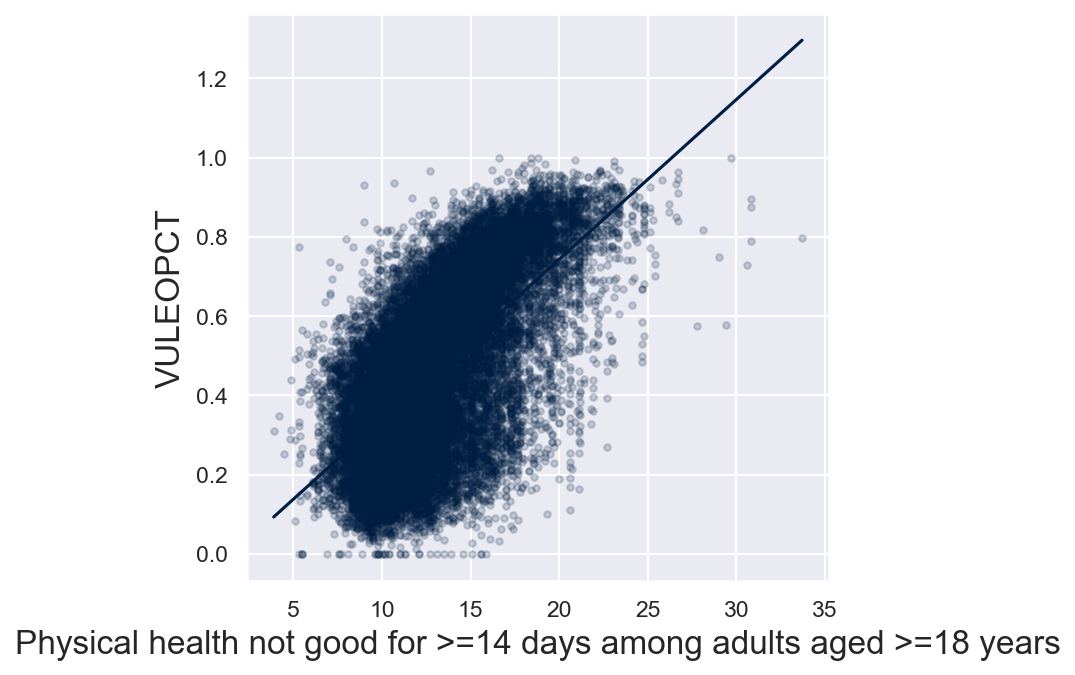

In [32]:
print("r: ", correlation(table5, "VULEOPCT", "Physical health not good for >=14 days among adults aged >=18 years"))
table5.scatter("Physical health not good for >=14 days among adults aged >=18 years","VULEOPCT",fit_line=True,alpha=0.18,s=10)

In [38]:
table6=table5
table6=table6.relabeled("Physical health not good for >=14 days among adults aged >=18 years","physical_health_outcome");

In [39]:
model = sm.ols(formula='VULEOPCT ~ physical_health_outcome', data = table6)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               VULEOPCT   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                 1.562e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:56:50   Log-Likelihood:                 8281.2
No. Observations:               23158   AIC:                        -1.656e+04
Df Residuals:                   23156   BIC:                        -1.654e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -0.0642      0.004    -14.761      0.000      -0.073      -0.056
physical_health_outcome     0.0404      0.000    124.973      0.000       0.040       0.041
==============================================================================
Omnibus:                      583.532   Durbin-Watson:                   0.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.565
Skew:                          -0.269   Prob(JB):                    8.01e-102
Kurtosis:                       2.560   Cond. No.                         52.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:**
 * Interpret your correlation coefficient
 * Interpret your graph -- do you notice anything interesting?
 * Interpret the r-squared value

*Your answer here.*

## Your Turn!

Run the cell below to look at all the possible variables available to you to choose from. From this table, choose **one** Health Outcome variable (this will be your Y variable), **one** Environmental Factor Variable, and **one** Demographic (%) variable. Conduct Simple Regression Analysis of Health Outcome and each of the other two variables, just as we did in the example above.

| Health Outcome (pick one) | Environmental Factor (pick one) | Demographic Factor (pick one) |
|----------------|----------------------|--------------------|
| Current asthma among adults aged >=18 years  |  Air toxics cancer risk  | Percent of households in linguistic isolation |
| Coronary heart disease among adults aged >=18 years | Respiratory hazard index | Poverty (Less than 200% of federal poverty line) |
| Cancer (excluding skin cancer) among adults aged >=18 years | Diesel particulate matter | Percent individuals age 25 or over with less than high school degree |
| Current lack of health insurance among adults aged 18-64 years | Particulate matter (PM2.5) | VULEOPCT |
| Physical health not good for >=14 days among adults aged >=18 years | Ozone | Unemployed civilians (percent) |
|| Traffic proximity and volume |  |
|| Proximity to RMP sites |  |
|| Proximity to TSDF sites ||
|| Proximity to NPL sites ||
|| Wastewater discharge ||
|| Percent pre-1960s housing (lead paint indicator) ||


You might be wondering what RMP, TSDF, and NPL sites are. These stand for Risk Management Plan sites; Treatment, Storage, and Disposal Facilities; and National Priorities List (also known as superfund sites). These sites all have some sort of hazardous substance, pollutant, or contaminants either currently or formerly stored onsite. To learn more about these sites, click the links below:
 * [NPL / Superfund Sites](https://www.epa.gov/superfund/superfund-national-priorities-list-npl)
 * [Treatment, Storage, and Disposal Facilities](https://dtsc.ca.gov/treatment-storage-and-disposal-facilities/)
 * [Risk Management Plan Sites](https://www.epa.gov/rmp/risk-management-plan-rmp-rule-overview)
 * [Map of All Superfund Sites](https://epa.maps.arcgis.com/apps/webappviewer/index.html?id=33cebcdfdd1b4c3a8b51d416956c41f1)
 

### Environmental Factor vs. Health Outcome (Single Regression)

In [ ]:
# Calculate your the correlation coefficient here
correlation(..., ..., ...)

In [ ]:
# Plot your scatter plot and regression line here
table.scatter(..., ..., fit_line=True, alpha = .18, s = 10)

In [ ]:
# Fill in the ...
model = sm.ols(formula='...', data = ...)
fit = model.fit()
fit.summary()

Question:
 * Interpret your correlation coefficient
  * Interpret your graph -- do you notice anything interesting?
  * Interpret the r-squared



*Your answer here*

### Demographic Factor vs. Health Outcome (Single Regression)

In [ ]:
# Calculate your the correlation coefficient here
...

In [ ]:
# Plot your scatter plot and regression line here
...

In [ ]:
# Fill in the ...
model = sm.ols(formula='...', data = ...)
fit = model.fit()
fit.summary()

Question:
 * Interpret your correlation coefficient
  * Interpret your graph -- do you notice anything interesting?
  * Interpret the r-squared

*Your answer here*

Fix this

So you see that linear regression of two variables (X and Y) is really just a line that goes through the scatter plot in a way that gives us the best estimate of what the Y value might be given an X value. If we are told that a Census Tract is made up 100% of Hispanics, looking at the plot above our prediction of frequency of Asthma attacks for that Census tract would be about 75; if we are told that a Census Tract has 0% Hispanics, our prediction would be a little less than 50. This is what the regression line allows us to do -- it allows us to see how one variable (X, i.e. % Hispanic) affects another variable (Y, i.e. number of asthma attacks), what the magnitude of this effect is, and, ultimately, it allows us to make predictions based on what we know about X.

## Multiple Regression: Putting it All Together

Regression isn't limited to just two variables! We saw above that we predicted a Y variable based on just one X variable. As the name suggests, Multiple regression allows us to use more than one X variable to predict an outcome. If you know the age of a patient for example, that alone can help predict health outcomes like whether they have cancer: a teenager is less likely to have lung cancer than a 70 year old. But if you had more information on patients, like how many packs of cigarettes they smoke a week, you can imagine that our prediction will be more accurate since it is not solely dependent on age.

This is the idea behind Multiple Regression. In the last section, we explored how frequency of asthma attacks in census tracts is related to the proportion of Hispanics in the census tract and, separately, the pollution burden score. We saw that the r-squared values for both of these relationships were 0.247 and 0.249, respectively (pretty bad). In this section, we'll explore how the combination of these two variables helps to more accurately predict Asthma attacks.
   * In single regression, our regression line was in the form: $Y = slope*X + intercept$
   * In multiple regression, our regression **"line" is defined very similarly as: $Y = slope1*X_1 + slope2*X_2 + intercept$

**You'll understand why "line" is in quotes when you see the multiple regression plot.

The slopes and intercept are calculated very similarly to what you saw before in single regression, but don't worry about the math behind this -- we'll just focus on how to interpret the predictive power of multipe regression as well as the 3-dimensional (!!) visualization of the regression plot.

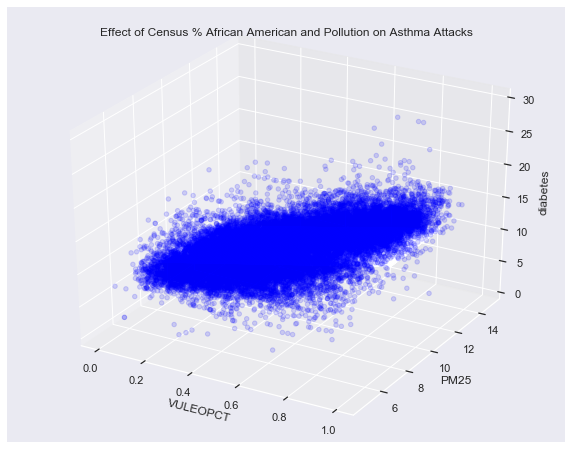

In [95]:
#this line makes the plot below interactive! You can slowly move the graph around to see from different angles.
%matplotlib inline

model = sm.ols(formula='diabetes ~ VULEOPCT + PM25', data = table4)
fit = model.fit()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 1, 0.01)                # generate a mesh
y_surf = np.arange(8, 12, 0.01)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'VULEOPCT': x_surf.ravel(), 'PM25': y_surf.ravel()})
out = fit.predict(exog = exog)

ax.plot_surface(x_surf, y_surf,
                out.values.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color= "yellow",
                alpha = 0.15)

ax.scatter(table4['VULEOPCT'], table4['PM25'], table4['diabetes'],
           c='blue',
           marker='o',
           alpha=.15)

ax.set_xlabel('VULEOPCT')
ax.set_ylabel('PM25')
ax.set_zlabel('diabetes')
ax.set_title('Effect of Census % African American and Pollution on Asthma Attacks')

plt.show()

In [70]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               diabetes   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     7952.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:43:59   Log-Likelihood:                -50181.
No. Observations:               23158   AIC:                         1.004e+05
Df Residuals:                   23155   BIC:                         1.004e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1685      0.065     95.625      0.000       6.042       6.295
VULEOPCT       7.8194      0.069    113.917      0.000       7.685       7.954
PM25           0.0443      0.007      6.330      0.000       0.031       0.058
==============================================================================
Omnibus:                     2417.679   Durbin-Watson:                   0.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10770.566
Skew:                           0.434   Prob(JB):                         0.00
Kurtosis:                       6.227   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do you notice about the R-Squared for multiple regression?

It's a little higher! 0.407 is still not the best, but it's certainly better than ~0.25. We see that the combination of pollution score and African American composition predicts the number of asthma attacks better than either of the individual simple regressions.

The Big Picture

Let's think about this for a moment. We saw that pollution score by itself does not predict asthma well, and knowing the percent composition of African Americans by itself does not predict asthma well. But, our multiple regression analysis shows that the combination of the pollution score and African American composition predicts asthma a lot better: a higher pollution score and a higher composition of African Americans in a census tract tends to result in a higher incidence of asthma. We might infer, then, that pollution more negatively affects African American communities than White communities. Perhaps environmental factors do disproportionately affect African American communities after all.

In [19]:
df[~df["Diagnosed diabetes among adults aged >=18 years"].isna()]

,Unnamed: 0,Unnamed: 0.1,GEOID10,Housing burden (percent),Total population,Median household income (% of state median household income),Current asthma among adults aged >=18 years,Coronary heart disease among adults aged >=18 years,Cancer (excluding skin cancer) among adults aged >=18 years,Current lack of health insurance among adults aged 18-64 years,Diagnosed diabetes among adults aged >=18 years,Physical health not good for >=14 days among adults aged >=18 years,Air toxics cancer risk,Respiratory hazard index,Diesel particulate matter,Particulate matter (PM2.5),Ozone,Traffic proximity and volume,Proximity to RMP sites,Proximity to TSDF sites,Proximity to NPL sites,Wastewater discharge,Percent pre-1960s housing (lead paint indicator),Individuals under 5 years old,Individuals over 64 years old,Linguistic isolation (percent),Percent of households in linguistic isolation,Poverty (Less than 200% of federal poverty line),Percent individuals age 25 or over with less than high school degree,Unemployed civilians (percent),Housing + Transportation Costs % Income for the Regional Typical Household,Score A,Score B,Socioeconomic Factors,Sensitive populations,Environmental effects,Exposures,Pollution Burden,Population Characteristics,Score C,Score D,Score E,"Low AMI, Low HS graduation",Meets socioeconomic criteria,Meets burden criteria,Score F (communities),OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,D_PM25_2,D_OZONE_2,D_DSLPM_2,D_CANCR_2,D_RESP_2,D_PTRAF_2,D_LDPNT_2,D_PNPL_2,D_PRMP_2,D_PTSDF_2,D_PWDIS_2,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,VULEOPCT,VULSVI6PCT,MINORPCT,LOWINCPCT,LINGISOPCT,LESSHSPCT,UNDER5PCT,OVER64PCT,Shape_Length,Shape_Area,FIPS code,State Abr.,County name,CBSA title,CBSA 2012 pop,County 2012 pop,2013 code,2006 code,1990-based code
0,0,10297,60014001001,0.143300,2991,2.922323,7.9,5.1,8.5,4.8,8.0,9.0,26.496604,0.437041,0.597205,8.272783,29.312510,1128.001614,0.175204,2.292090,0.118582,0.000000e+00,0.176558,0.061852,0.254096,0.011601,0.036683,0.095909,0.017828,0.050000,76.0,0.115592,0.013343,0.485942,0.669558,0.480974,0.488320,0.485871,0.577750,0.280712,0.055911,0.297226,False,False,False,False,10298,60014001001,California,CA,9,2991,-3824.220643,-13550.156040,-276.067254,-12248.460670,-202.028692,-5.214360e+05,-81.616573,-54.816203,-80.990880,-1059.553708,0.000000,8.272783,29.312510,0.597205,26.496604,0.437041,1128.001614,0.176558,0.118582,0.175204,2.292090,0.000000e+00,0.201916,0.129048,0.307924,0.095909,0.036683,0.017828,0.061852,0.254096,18116.601500,1.108122e+07,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
1,1,10298,60014002001,0.068750,1102,3.156775,8.0,4.0,6.9,4.8,6.1,7.6,28.281955,0.477660,0.784154,8.309303,28.514542,5492.556095,0.236346,5.426261,0.152012,0.000000e+00,0.957014,0.081670,0.195100,0.000000,0.000000,0.078947,0.030941,0.036082,55.0,0.135196,0.016439,0.309663,0.576540,0.658200,0.564220,0.595547,0.443102,0.263888,0.039194,0.196257,False,False,True,False,10299,60014002001,California,CA,9,1102,-1552.411631,-5327.318832,-146.502048,-5283.865045,-89.240348,-1.026164e+06,-178.797067,-28.400038,-44.156077,-1013.778242,0.000000,8.309303,28.514542,0.784154,28.281955,0.477660,5492.556095,0.957014,0.152012,0.236346,5.426261,0.000000e+00,0.186933,0.113596,0.294918,0.078947,0.000000,0.030941,0.081670,0.195100,3775.322995,4.642223e+05,6001,CA,Alameda County,"San Francisco-Oakland-Hayward, CA",4455560,1554720,1,1,1
2,2,10299,60014002002,0.068750,895,2.161002,8.0,4.0,6.9,4.8,6.1,7.6,28.281955,0.477660,0.784154,8.309303,28.514542,10897.251150,0.239507,5.930150,0.161547,0.000000e+00,0.871921,0.004469,0.194413,0.000000,0.000000,0.163861,0.009211,0.024845,54.0,0.155107,0.017313,0.288754,0.349317,0.655383,0.567425,0.596744,0.319035,0.190383,0.049583,0.181428,False,False,True,False,10300,60014002002,California,CA,9,895,-1011.337458,-3470.546717,-95.440543,-3442.238218,-58.136711,-1.326320e+06,-106.122806,-19.662099,-29.150738,-721.767224,0.000000,8.309

In [27]:
def show_top_20_most_correlated_features(column_name):
    return df.corr()[column_name].sort_values(ascending=False).head(40)

In [28]:
show_top_20_most_correlated_features("VULEOPCT")

VULEOPCT                                                                1.000000
VULSVI6PCT                                                              0.960289
MINORPCT                                                                0.906108
Score D                                                                 0.893124
Score A                                                                 0.883282
Score B                                                                 0.879865
Score E                                                                 0.870250
D_CANCR_2                                                               0.842806
D_RESP_2                                                                0.838697
Poverty (Less than 200% of federal poverty line)                        0.838585
LOWINCPCT                                                               0.838585
D_PM25_2                                                                0.838180
Current lack of health insur

In [22]:
list_of_cols = df.columns.to_list()

In [55]:
interact(show_top_20_most_correlated_features, column_name=list_of_cols)

Unnamed: 0                                          1.000000
OBJECTID                                            1.000000
ID                                                  0.976443
GEOID10                                             0.976443
FIPS code                                           0.975705
County 2012 pop                                     0.427758
Particulate matter (PM2.5)                          0.307331
PM25                                                0.307331
Pollution Burden                                    0.306319
Exposures                                           0.290874
Score C                                             0.273093
CANCER                                              0.245061
Air toxics cancer risk                              0.245061
Environmental effects                               0.239799
Meets burden criteria                               0.233533
PRE1960PCT                                          0.230503
Percent pre-1960s housin

<function __main__.show_top_20_most_correlated_features(column_name)>

In [30]:
df.corr().abs()["PM25"].sort_values(ascending=False).head(20)

PM25                          1.000000
Particulate matter (PM2.5)    1.000000
Exposures                     0.876162
Pollution Burden              0.841204
Score C                       0.753842
Air toxics cancer risk        0.702478
CANCER                        0.702478
Ozone                         0.555567
OZONE                         0.555567
County 2012 pop               0.538524
Respiratory hazard index      0.536086
RESP                          0.536086
Diesel particulate matter     0.530642
DSLPM                         0.530642
Meets burden criteria         0.516309
Environmental effects         0.476890
MINORPCT                      0.426171
D_PM25_2                      0.390953
D_DSLPM_2                     0.390325
Score F (communities)         0.384537
Name: PM25, dtype: float64

In [ ]:
code_to_classification = pd.DataFrame({'2013 code': [1,2,3,4,5,6], 'Classification': ["Large Metro", "Medium Metro", "Medium Metro", "Non-Metro", "Non-Metro", "Non-Metro"]})